In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import time
import multiprocessing as mp
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import poisson
from scipy.optimize import curve_fit

In [2]:
import scipy.stats as stats #Aula de Binagem

In [7]:
df = pd.read_csv('exemplo_2.dat', delim_whitespace=True)
ex2 = pd.DataFrame(data = df.values, columns = ['x', 'y'])
x=ex2['x']
y=ex2['y']

In [11]:
binagem = 10

x_bin, bin_edge, bin_number = stats.binned_statistic(x,x,statistic='mean',bins=int(len(x)/binagem))
y_bin, bin_edge, bin_number = stats.binned_statistic(x,y,statistic='mean',bins=int(len(x)/binagem))

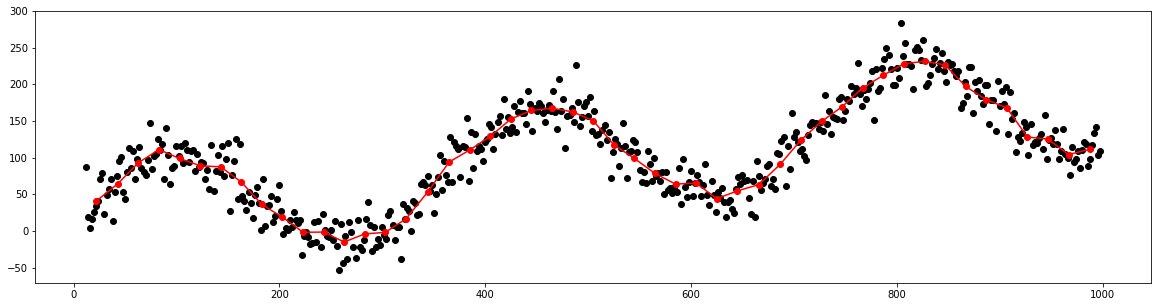

In [12]:
plt.figure(figsize = [20,5], facecolor='white')

plt.plot(x,y, 'ko')
plt.plot(x_bin,y_bin,'ro-')

plt.show()

In [16]:
#Media Passante -> melhor se os dados estão acurados. Pontos muito esporadicos afetam o fit e pioram sua qualidade, incluindo ruido.
#Com chutes baixos/ poucos potos esporadicos, esse metodo minimiza os ruidos randomicos.
valor = 5

y_mp = np.convolve(y, np.ones(valor), 'valid')/valor
x_mp = np.convolve(x, np.ones(valor), 'valid')/valor

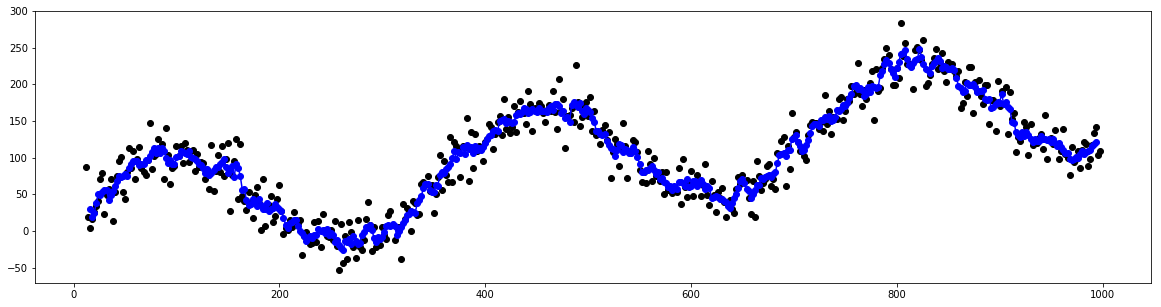

In [17]:
plt.figure(figsize = [20,5])

plt.plot(x,y, 'ko')
plt.plot(x_mp,y_mp,'bo-')

plt.show()

In [28]:
#Filtro de Savitzky-Golay
import scipy.signal as signal
#window_length = impar -> faz ajuste de acordo c ponto posicionado simetricamente entre outros.
y_sg = signal.savgol_filter(x=y, window_length=15, polyorder=1)
x_sg = signal.savgol_filter(x=x, window_length=15, polyorder=1)

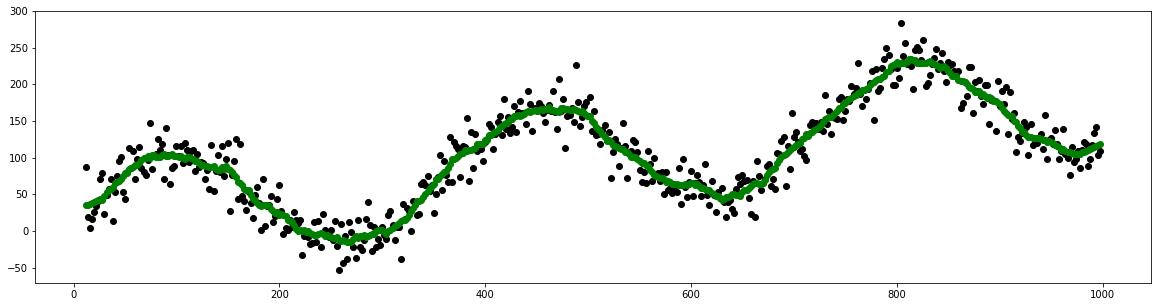

In [29]:
plt.figure(figsize = [20,5])

plt.plot(x,y, 'ko')
plt.plot(x_sg,y_sg,'go-')

plt.show()

In [20]:
df3 = pd.read_csv('exemplo_3.dat', delim_whitespace=True)
ex3 = pd.DataFrame(data = df3.values, columns = ['x', 'y'])
x_3=ex3['x']
y_3=ex3['y']

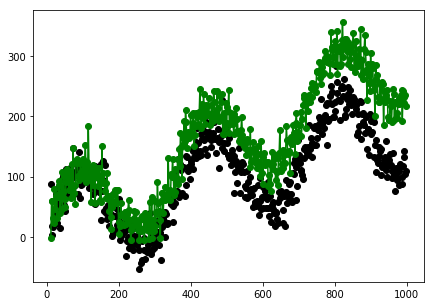

In [34]:
y_sg = signal.savgol_filter(x=y_3, window_length=5, polyorder=4)
x_sg = signal.savgol_filter(x=x_3, window_length=5, polyorder=4)
plt.figure(figsize = [7,5])

plt.plot(x,y, 'ko')
plt.plot(x_sg,y_sg,'go-')

plt.show()

In [35]:
#Até aqui tentamos remover o randomico, agora aprenderemos a remover o erro sistematico
#Detrend

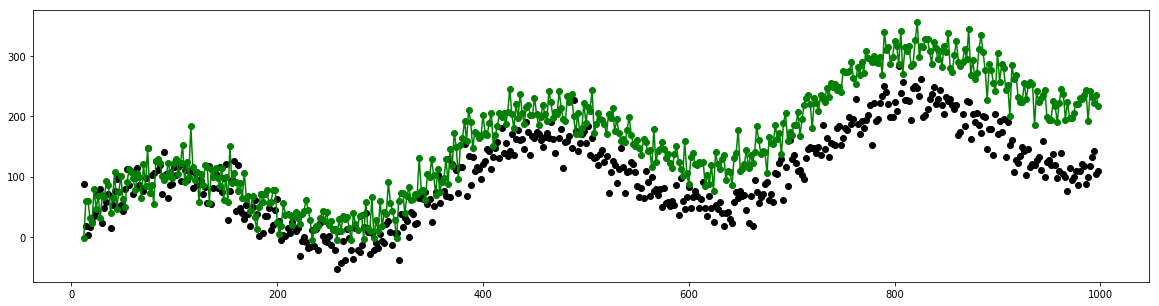

In [37]:
#Utilizar x,y = calibradores x_3,y_3 = alvos
plt.figure(figsize = [20,5])

plt.plot(x,y, 'ko')
plt.plot(x_3,y_3,'go-')

plt.show()